<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>


# YouTube - Follow content views monthly
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/LinkedIn/Linkedin_Follow_number_of_content_published.ipynb" target="_parent"><img src="https://naasai-public.s3.eu-west-3.amazonaws.com/open_in_naas.svg"/></a>

**Tags:** #linkedin #html #plotly #csv #image #content #analytics #automation

**Author:** [Florent Ravenel](https://www.linkedin.com/in/florent-ravenel/)

This notebook follows the evolution of content views on YouTube.

## Input

In [1]:
# Except allow to run common.ipynb once using Naas Engine
try:
    %run "../common.ipynb"
except:
    %run "common.ipynb"

### Setup Variables

In [15]:
KPI_TITLE = "Views"

### Setup Constants

In [16]:
# Inputs
PLATFORM = YOUTUBE
LOGO = YOUTUBE_LOGO
COLOR = YOUTUBE_COLOR
PERIOD = PERIOD_MTD
PERIOD_D = DISPLAY_MTD
PERIOD_TEXT = TEXT_MTD
PERIOD_TEXT2 = TEXT2_MTD
TITLE = f"Content {KPI_TITLE.lower()} over the past {str(MONTH_ROLLING)} {PERIOD_TEXT2}"
COL_VALUE = "VIEWCOUNT"
COL_DATE = "PUBLISHEDAT"

# Outputs
name_output = f"YouTube_Follow_content_{KPI_TITLE.lower()}_monthly"
csv_output = path.join("Outputs", f"{name_output}.csv")
html_output = path.join("Outputs", f"{name_output}.html")
image_output = path.join("Outputs", f"{name_output}.png")

## Model

### Get contents

In [2]:
df_videos = get_data(INPUT_DATABASE)
print("✅ Videos fetched:", len(df_videos))
df_videos.head(1)

Content fetched: 28


,CHANNEL_ID,CHANNEL_TITLE,ID,URL,TITLE,DESCRIPTION,VIEWCOUNT,LIKECOUNT,DISLIKECOUNT,FAVORITECOUNT,COMMENTCOUNT,DURATION,DURATION_SECONDS,THUMBNAILS,PUBLISHEDAT
0,UCKKG5hzjXXU_rRdHHWQ8JHQ,naas,ltdJOX_DVtE,https://www.youtube.com/watch?v=ltdJOX_DVtE,Create a YouTube API Key (In less than 2 minutes),This short video will show you how to create a...,47,3,NaN,0,0,0:01:40,100,https://i.ytimg.com/vi/ltdJOX_DVtE/hqdefault.jpg,2022-06-03 07:52:29+00:00
1,UCKKG5hzjXXU_rRdHHWQ8JHQ,naas,TIQiMTpzH-Q,https://www.youtube.com/watch?v=TIQiMTpzH-Q,⚡️🌎 Naas Community Call (2022/03/03),Here is what we are going to talk about:\n\n⚡️...,58,4,NaN,0,0,0:51:24,3084,https://i.ytimg.com/vi/TIQiMTpzH-Q/hqdefault.jpg,2022-03-07 21:00:00+00:00
2,UCKKG5hzjXXU_rRdHHWQ8JHQ,naas,1kjxWtgeV3E,https://www.youtube.com/watch?v=1kjxWtgeV3E,💬 Using NLP to extract and summarize transcrip...,🌍💬 Interested in Open Source + NLP but don't k...,595,13,NaN,0,0,0:07:02,422,https://i.ytimg.com/vi/1kjxWtgeV3E/hqdefault.jpg,2021-10-15 18:17:04+00:00
3,UCKKG5hzjXXU_rRdHHWQ8JHQ,naas,lvZKZx9ngrc,https://www.youtube.com/watch?v=lvZKZx9ngrc,Code is power - A brief history of coding.,#code #opensource #power #office #hours #naas,95,10,NaN,0,2,1:02:56,3776,https://i.ytimg.com/vi/lvZKZx9ngrc/hqdefault.jpg,2021-10-03 18:07:15+00:00
4,UCKKG5hzjXXU_rRdHHWQ8JHQ,naas,4ds2FDI_60g,https://www.youtube.com/watch?v=4ds2FDI_60g,Push Jupyter notebooks to Production ⚡️ with 5...,#naas #notebooks #lowcode #opensource\n\n✊⚡️Pu...,1491,33,NaN,0,7,0:10:47,647,https://i.ytimg.com/vi/4ds2FDI_60g/hqdefault.jpg,2021-09-16 16:33:00+00:00
5,UCKKG5hzjXXU_rRdHHWQ8JHQ,naas,tQd-4AsHvqU,https://www.youtube.com/watch?v=tQd-4AsHvqU,Is an idea environmentally friendly? 🌎👍 👎 (Hug...,#huggingface #transformers #ai #model #jupyter...,38,1,NaN,0,0,0:15:59,959,https://i.ytimg.com/vi/tQd-4AsHvqU/hqdefault.jpg,2021-09-06 17:00:44+00:00
6,UCKKG5hzjXXU_rRdHHWQ8JHQ,naas,jmC5VDN-MOI,https://www.youtube.com/watch?v=jmC5VDN-MOI,🚨 Open Source Contribution step by step (Githu...,#opensource #contribution #git #naas #notebook...,350,20,NaN,0,0,0:43:37,2617,https://i.ytimg.com/vi/jmC5VDN-MOI/hqdefault.jpg,2021-09-01 19:01:49+00:00
7,UCKKG5hzjXXU_rRdHHWQ8JHQ,naas,1CfW0N8x8og,https://www.youtube.com/watch?v=1CfW0N8x8og,🧨 👿 What is wrong with Data Project? ...and wh...,#data #dataops #devops #agile #businesteam #te...,40,2,NaN,0,0,0:53:54,3234,https://i.ytimg.com/vi/1CfW0N8x8og/hqdefault.jpg,2021-08-17 15:09:55+00:00
8,UCKKG5hzjXXU_rRdHHWQ8JHQ,naas,W02XVb8IbGA,https://www.youtube.com/watch?v=W02XVb8IbGA,⏱1-minute pitch video for Pioneer,A 1-minute video about Naas project.,112,10,NaN,0,1,0:01:01,61,https://i.ytimg.com/vi/W02XVb8IbGA/hqdefault.jpg,2021-08-09 16:41:49+00:00
9,UCKKG5hzjXXU_rRdHHWQ8JHQ,naas,NjUhb92i9eM,https://www.youtube.com/watch?v=NjUhb92i9eM,🌎🔗Making sense of LinkedIn data: how Mark used...,#socialmedia #linkedin #datamining #datascienc...,147,5,NaN,0,0,0:58:47,3527,https://i.ytimg.com/vi/NjUhb92i9eM/hqdefault.jpg,2021-07-27 18:07:10+00:00


### Get dataframe trend

In [19]:
def get_trend(df_init,
              col_date,
              col_value,
              agg_value):
    # Init variable
    df = df_init.copy()
    
    # Groupby period
    df[col_value] = df[col_value].astype(float)
    df[col_date] = pd.to_datetime(df[col_date].str[:-6]).dt.strftime(PERIOD)
    df = df.groupby(col_date, as_index=False).agg({col_value: agg_value})
    
    # Rename column
    to_rename = {
        col_date: "DATE",
        col_value: "VALUE"
    }
    df = df.rename(columns=to_rename)
    
    # Add last month in not in dataframe
    if df.loc[df.index[-1], "DATE"] != datetime.now().strftime(PERIOD):
        tmp_df = df[-1:].reset_index(drop=True)
        tmp_df.loc[0, "DATE"] = datetime.now().strftime(PERIOD)
        tmp_df.loc[0, "VALUE"] = 0
        df = pd.concat([df, tmp_df]).reset_index(drop=True)
    
    # Calc variation
    for index, row in df.iterrows():
        if index > 0:
            n = df.loc[df.index[index], "VALUE"]
            n_1 = df.loc[df.index[index-1], "VALUE"]
            df.loc[df.index[index], "VALUE_COMP"] = n_1
            df.loc[df.index[index], "VARV"] = n - n_1
            df.loc[df.index[index], "VARP"] = 0
            if n_1 > 0:
                df.loc[df.index[index], "VARP"] = (n - n_1) / abs(n_1)
    df = df.fillna(0)
    
    # Plotly: Date display
    df["DATE_D"] = pd.to_datetime(df["DATE"], format=PERIOD).dt.strftime(PERIOD_D)
    
    # Plotly: Value display
    df["VALUE_D"] = "<b><span style='font-family: Arial;'>" + df["VALUE"].map("{:,.0f}".format).str.replace(",", " ") + "</span></b>"
    
    # Plotly: Variation display
    df["VARV_D"] = df["VARV"].map("{:,.0f}".format).str.replace(",", " ")
    df.loc[df["VARV"] >= 0, "VARV_D"] = "+" + df["VARV_D"]
    df["VARP_D"] = df["VARP"].map("{:,.0%}".format).str.replace(",", " ")
    df.loc[df["VARP"] >= 0, "VARP_D"] = "+" + df["VARP_D"]
    
    # Plotly: hovertext
    df["TEXT"] = ("<b><span style='font-size: 14px;'>" + df["DATE_D"].astype(str) + ": " + df["VALUE_D"] + "</span></b><br>"
                  "<span style='font-size: 12px;'>" + f"{PERIOD_TEXT}: " + df["VARV_D"] + " (" + df["VARP_D"] + ")</span>")
    
    # Return month rolling
    return df[-MONTH_ROLLING:].reset_index(drop=True)

df_actual = get_trend(df_contents,
                      col_date=COL_DATE,
                      col_value=COL_VALUE,
                      agg_value="sum")
df_actual#.tail(5)

,DATE,VALUE,VALUE_COMP,VARV,VARP,DATE_D,VALUE_D,VARV_D,VARP_D,TEXT
0,2020-12,18618.0,0.0,0.0,0.000000,Dec 2020,<b><span style='font-family: Arial;'>18 618</s...,+0,+0%,<b><span style='font-size: 14px;'>Dec 2020: <b...
1,2021-02,3538.0,18618.0,-15080.0,-0.809969,Feb 2021,<b><span style='font-family: Arial;'>3 538</sp...,-15 080,-81%,<b><span style='font-size: 14px;'>Feb 2021: <b...
2,2021-03,499.0,3538.0,-3039.0,-0.858960,Mar 2021,<b><span style='font-family: Arial;'>499</span...,-3 039,-86%,<b><span style='font-size: 14px;'>Mar 2021: <b...
3,2021-04,120.0,499.0,-379.0,-0.759519,Apr 2021,<b><span style='font-family: Arial;'>120</span...,-379,-76%,<b><span style='font-size: 14px;'>Apr 2021: <b...
4,2021-05,279.0,120.0,159.0,1.325000,May 2021,<b><span style='font-family: Arial;'>279</span...,+159,+132%,<b><span style='font-size: 14px;'>May 2021: <b...
5,2021-06,98.0,279.0,-181.0,-0.648746,Jun 2021,<b><span style='font-family: Arial;'>98</span>...,-181,-65%,<b><span style='font-size: 14px;'>Jun 2021: <b...
6,2021-07,391.0,98.0,293.0,2.989796,Jul 2021,<b><span style='font-family: Arial;'>391</span...,+293,+299%,<b><span style='font-size: 14px;'>Jul 2021: <b...
7,2021-08,152.0,391.0,-239.0,-0.611253,Aug 2021,<b><span style='font-family: Arial;'>152</span...,-239,-61%,<b><span style='font-size: 14px;'>Aug 2021: <b...
8,2021-09,1879.0,152.0,1727.0,11.361842,Sep 2021,<b><span style='font-family: Arial;'>1 879</sp...,+1 727,+1 136%,<b><span style='font-size: 14px;'>Sep 2021: <b...
9,2021-10,690.0,1879.0,-1189.0,-0.632783,Oct 2021,<b><span style='font-family: Arial;'>690</span...,-1 189,-63%,<b><span style='font-size: 14px;'>Oct 2021: <b...


### Plot barchart

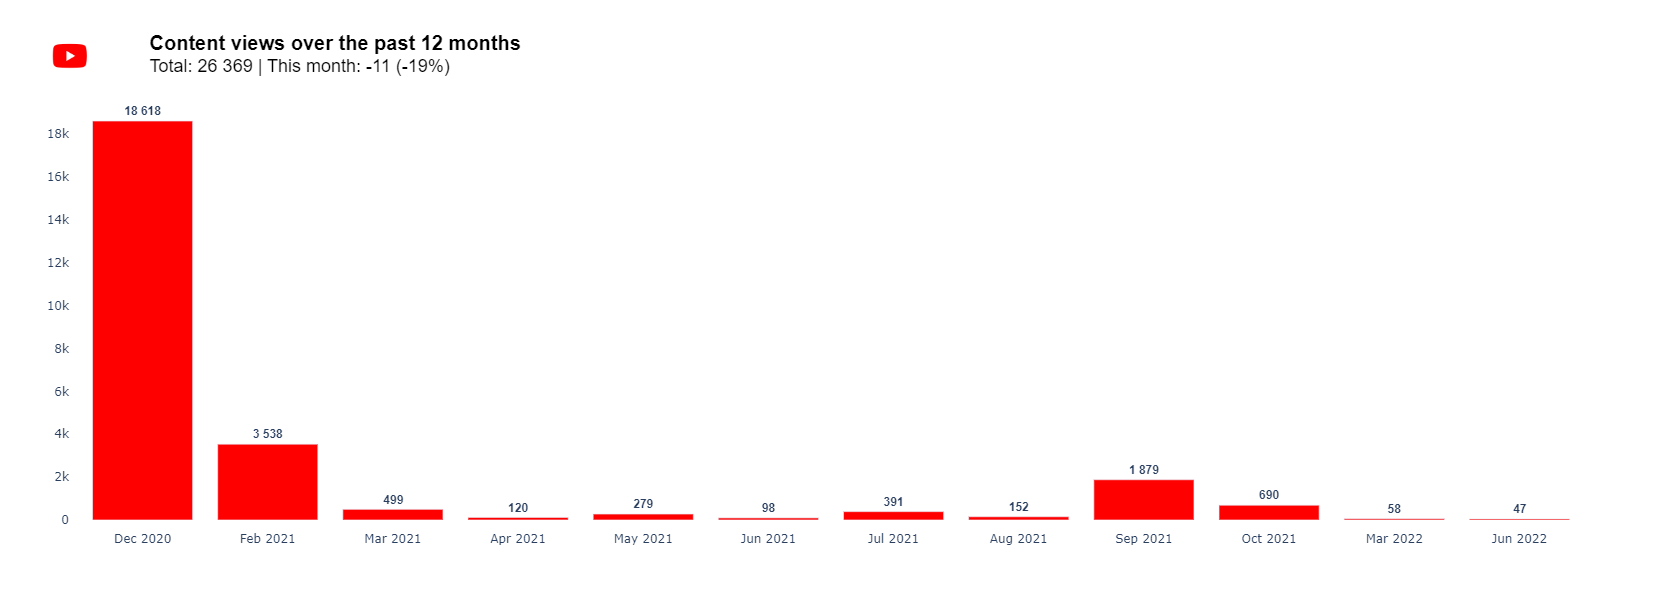

In [20]:
fig = create_barchart(df_actual)

## Output

### Save and share your csv file

In [21]:
# Save your dataframe in CSV
df_actual.to_csv(csv_output, index=False)

# Share output with naas
csv_link = naas.asset.add(csv_output)

#-> Uncomment the line below to remove your asset
# naas.asset.delete(csv_output)

👌 Well done! Your Assets has been sent to production.



<IPython.core.display.Javascript object>

Button(button_style='primary', description='Copy URL', style=ButtonStyle())

Output()

PS: to remove the "Assets" feature, just replace .add by .delete


### Save and share your graph in HTML

In [22]:
# Save your graph in HTML
fig.write_html(html_output)

# Share output with naas
html_link = naas.asset.add(html_output, params={"inline": True})

#-> Uncomment the line below to remove your asset
# naas.asset.delete(html_output)

👌 Well done! Your Assets has been sent to production.



<IPython.core.display.Javascript object>

Button(button_style='primary', description='Copy URL', style=ButtonStyle())

Output()

PS: to remove the "Assets" feature, just replace .add by .delete


### Save and share your graph in image

In [23]:
# Save your graph in PNG
fig.write_image(image_output)

# Share output with naas
image_link = naas.asset.add(image_output)

#-> Uncomment the line below to remove your asset
# naas.asset.delete(image_output)

👌 Well done! Your Assets has been sent to production.



<IPython.core.display.Javascript object>

Button(button_style='primary', description='Copy URL', style=ButtonStyle())

Output()

PS: to remove the "Assets" feature, just replace .add by .delete


### Update Notion Report

In [24]:
update_report_status(KPI_TITLE,
                     PLATFORM,
                     df_actual,
                     image_link=image_link,
                     html_link=html_link,
                     csv_link=csv_link)

✅ Page 'Views / YouTube' updated in Notion.
